<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Naive Bayes Language Detection Lab

_Author: David Yerrington (SF) _

In this lab, we will use Naive Bayes (and other classifiers) to auto-detect the language of a given tweet. We will then assess the performance of our classifier.

In [1]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

%matplotlib inline

sns.set_style("darkgrid")

In [2]:
tweets_df = pd.read_csv("datasets/tweets_language.csv", encoding="utf-8", index_col=0)
tweets_df.index = tweets_df.index.astype(int)    # By default, everything read in is a string!

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9431 entries, 0 to 9408
Data columns (total 2 columns):
LANG    9409 non-null object
TEXT    9409 non-null object
dtypes: object(2)
memory usage: 221.0+ KB


In [4]:
# Note above that some rows are null, which we cannot use for training
tweets_df = tweets_df.dropna()

In [5]:
tweets_df.head()

,LANG,TEXT
0,en,The #Yolo bailout: Greece's ex-finance chief h...
1,en,Another mental Saturday night. It will be near...
2,en,Sometimes you take bedtime selfies w yer hat s...
3,en,Currently just changed my entire outfit includ...
4,en,I just like listening to @SpotifyAU's top 100 ...


### 1. Data exploration

#### 1.A. Explore a list of tweet words that occur more than 50x
Plot a histogram of some kind might be helpful.

In [58]:
# Let's use the CountVectorizer to count words for us 
cvt      =  CountVectorizer(strip_accents='unicode',ngram_range=(1,1))
X_all    =  cvt.fit_transform(tweets_df['TEXT'])
# Complete the code

In [59]:
X_df = pd.DataFrame(X_all.todense(), columns = cvt.get_feature_names())
X_df.head()

,00,000,001,0031,007,00j6mauvoo,00w4ed4xro,00一定要準時收看,01,01811,...,香格里拉台南遠東國際大飯店,香港金加利茶餐厅,高登,高速公路,高速稳定vpn,鬆獅,麥當勞,麻麻在旁邊喊著,黃金歲月快速的得到了也慢慢的逝去,龍洞四季灣
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
word_counts = X_df.sum(axis = 0)

co                    8544
http                  6093
https                 2658
rt                    2222
love                  1758
dog                   1219
family                1082
france                1032
de                     984
us                     951
da                     889
peace                  811
yolo                   742
la                     723
earth                  702
in                     604
the                    598
planet                 589
math                   473
en                     425
to                     357
of                     350
by                     333
hund                   333
que                    332
on                     321
vive                   307
silver                 304
un                     304
me                     290
                      ... 
pequenos                 1
peram                    1
perco                    1
perde                    1
pensavo                  1
pensava                  1
p

In [18]:
type(word_counts)

pandas.core.series.Series

In [20]:
word_50 = word_counts[word_counts > 50].sort_values(ascending = False)

In [22]:
word_50.head()

co       8544
http     6093
https    2658
rt       2222
love     1758
dtype: int64

In [34]:
y = np.arange(len(word_50.index.values))
X = word_50

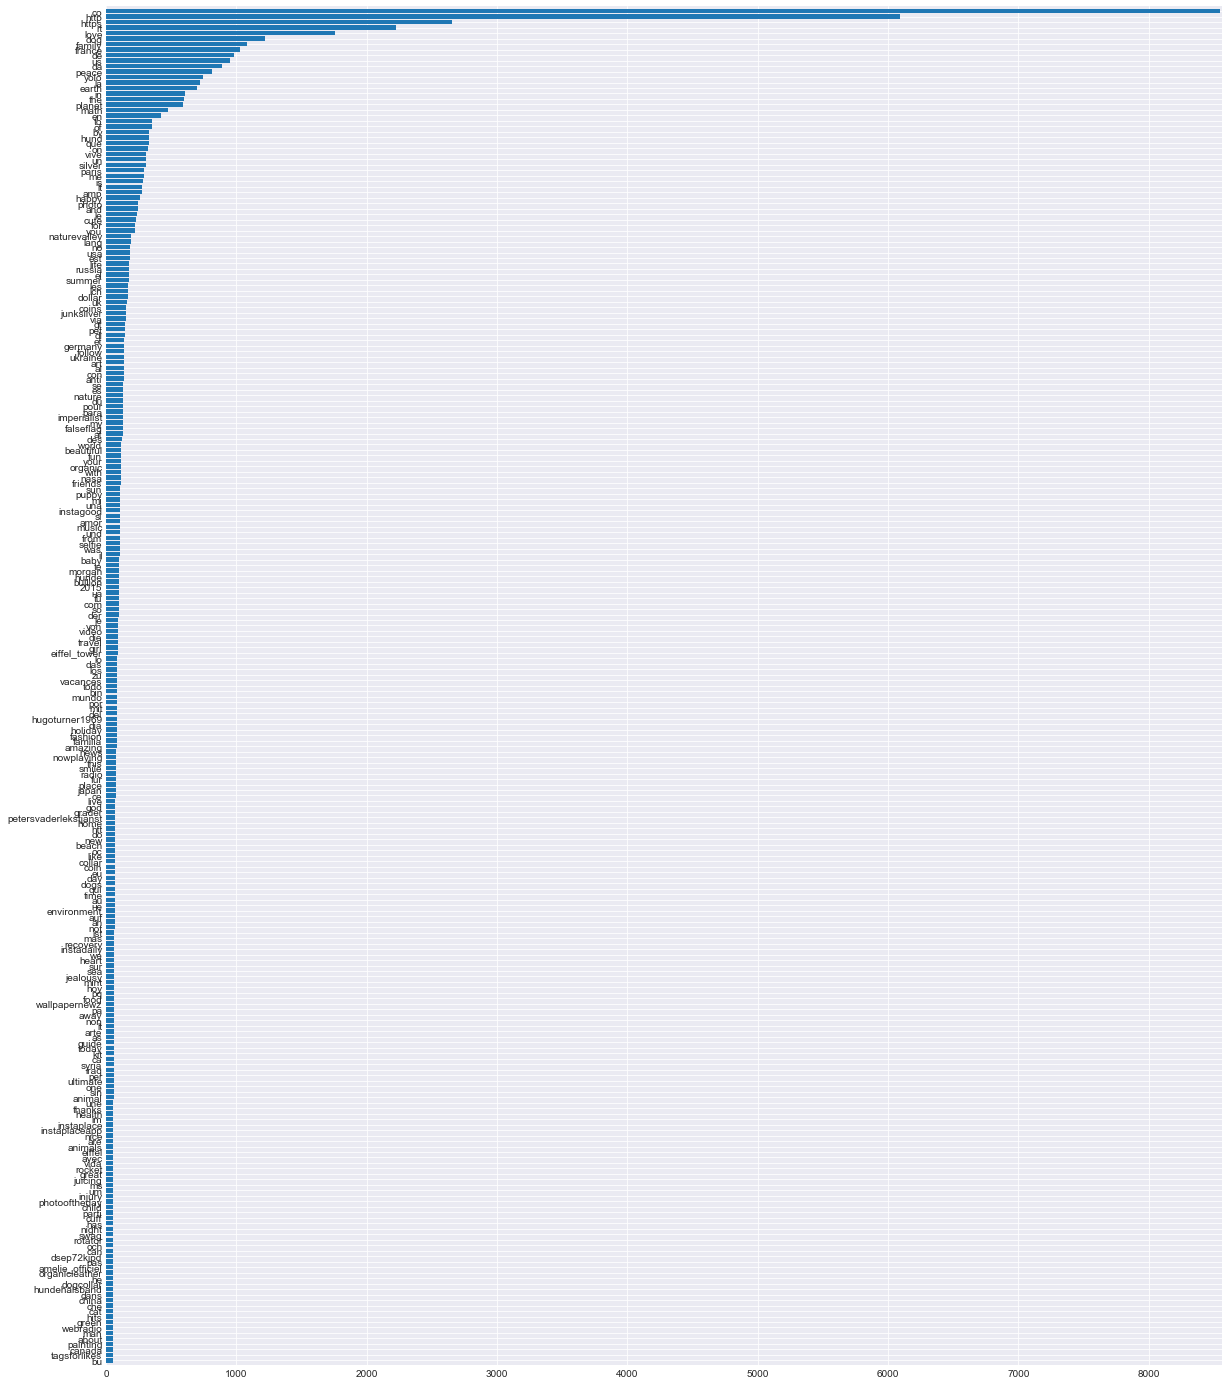

In [54]:
fig, ax = plt.subplots(figsize = (20,25))
_ = ax.barh(y,X)
_ = ax.set_yticks(y)
_ = ax.set_yticklabels(word_50.index.values)
_ = ax.invert_yaxis()
_ = ax.margins(0.002)

#### 1.B. Investigate histogram of counts

#### 1.C. Try it again with stopword removal 

In [55]:
insults_df

NameError: name 'insults_df' is not defined

In [6]:
# Let's use the CountVectorizer to count words for us
cvt      =  CountVectorizer(strip_accents='unicode')
X_all    =  cvt.fit_transform(insults_df['Comment'])

# Complete the code

#### 1.D. Explore ngrams between 2 and 4
Display the top 75 ngrams with frequencies.  Look at each class to see how they are same / different.

In [7]:
# look up the appropriate parameters
# CountVectorizer?


#### 1.E. (Optional) try expanding the list of stopwords
There are definitely some non-words such as web urls, etc. If you could remove them, this could help us improve the score.  Identify word/tokens that don't add much value to either class.  **You should additionally look at ngrams per language to fine tune your preprocessing.  This has the greatest potential to improve your results without tuning any model parameters.**

Using `nltk.corpus`, we can get a baseline list of stop words.  Try to expand it and pass it to our vectorizer.

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


### 2. Setup a test / train split of your data using any method you wish.
Try 70/30 to start.

### 3. Setup a "Pipeline" to vectorize and use MultinomialNB classifier.
Use `lowercase`, `strip_accents`, `Pipeline`, and optionally your updated `stop_words`.  Fit your comment data using the "Insult" feature as your response.

Fit your training data to your pipeline, then score it.

In [16]:
# Here's the code -- you can adapt it from here on out.
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 

pipeline.fit(tweets_train["TEXT"], tweets_train["LANG"])

# don't forget to score

NameError: name 'tweets_train' is not defined

#### 3.A. Swap out MultinomialNB with BernoulliNB in the pipeline
How do they compare? Do you have a guess of why BernoulliNB is so poor?

#### 3.B. Also try logistic regression and random forests in the pipeline
How do they compare? Recall that Logistic Regression is discriminative whereas Naive Bayes is generative. Logistic Regression uses optimization to fit a formula that discriminates between the classes, whereas Naive Bayes essentially just computes aggregate statistics. So, Logistic Regression should have a longer training time than Naive Bayes -- does it here? (see `%time`)

Note that Logistic Regression and Random Forests both allow you to see feature "importance"/coefficients. In this case, these coefficients will inform you how strong each word indicates a language. Optionally, see if you can sort these coefficients by their values to get the strongest and weakest indicator words for languages.

#### 3.C. Also try tweaking the paramters of CountVectorizer and TfidfTranformer

Remove Tfidf also. Good / bad?

### 4. Check your score.
Which languages does your model work best at? Run a classification report for all languages. [Plot AUC/ROC](../../week-04/2.3-evaluating_model_fit/code/AUC-ROC-codealong.ipynb) for particular languages (vs all others) and compare them -- do they show that some languages perform better? Does our model perform worse than guessing on some languages? Also, [review classfication reporting metrics](../../week-04/4.3-advanced-model_evaluation/code/starter-code/week4-4.1-classification-report.ipynb).

In [17]:
# update the code to display the classification report
print classification_report?

### Revisiting: ROC/AUC

In [ ]:
def multi_roc(y, probs):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        # probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve

def plot_roc(y, probs, threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
   
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()

In [18]:
# Using your pipeline, predict the probabilities of each language
# Then, call plot_roc

## Your code here to predict the probabilities of each class

# EXAMPLE of testing a particular language
# plot_roc(tweets_test['LANG'].apply(lambda x: x == "en"), predicted_proba[:, list(pipeline.classes_).index("en")])

### 5 Check out your baseline.

What is the chance that you will randomly guess correctly without any modeling? Assume the language of your input phrase has the same chance of appearing as the languages in your training set.

### 6. What is your model not getting right?

Check out the incorrectly classified tweets.  Any noticable patterns? Can you explain why many of these are incorrectly classified, given what you know about how Naive Bayes works?  Pay particular attention to the recall metric.  What might be done in preprocessing steps to improve accuracy?  

- Try to improve with your **preprocessing first**
- THEN try to tweak your **parameters to your model(s)**

## Additional Practice
In the datasets directory are two additional datasets you can use for additional pratice:

- **/datasets/tweets_sentiment.csv** - Sentiment analysis

- **/datasets/insults_train.csv** - [Kaggle dataset](https://www.kaggle.com/c/detecting-insults-in-social-commentary). _WARNING:_ This content is fairly provacative and contains very offensive and insensitive words. However, this type of problem is very common in the continuum of comment threads throughout the web.

    - Check [this blog post](http://webmining.olariu.org/my-first-kaggle-competition-and-how-i-ranked/) by a guy who used SVM, a "neural network", a ton of cleaning, then placed 3rd in a Kaggle competition featuing this same dataset. Also see [this blog post](http://peekaboo-vision.blogspot.de/2012/09/recap-of-my-first-kaggle-competition.html) -- he got 6th place and found the best model was a simple Logistic Regression!

#### Where Next?

If you're interested in this type of problem, a great area to read up on is sentiment analysis.  This [Kaggle dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data) is an excellent opportunity to practice more.  Also these whitepapers are great places to expand on this topic:

- [Fast and accurate sentiment classification using an
enhanced Naive Bayes model](http://arxiv.org/pdf/1305.6143.pdf) *Great overview!*
- [Sarcasm Detection](http://www.aclweb.org/anthology/P15-2124)
- [Making Computers Laugh:
Investigations in Automatic Humor Recognition](http://www.aclweb.org/anthology/H05-1067)
- [Modelling Sarcasm in Twitter, a Novel Approach](http://www.aclweb.org/anthology/W14-2609)
- [RUNNING HEAD: NARCISSISM AND LIE DETECTION](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/107345/zarins.finalthesis.pdf?sequence=1) *The study metrics are interesting*